# Visualizations & LLM comparison

In [21]:
import lucem_illud
import pandas as pd

In [19]:
# Data
fw_DF = pd.read_csv("dn_text_expanded_coded_clean.csv", index_col=0)
fw_DF = fw_DF.drop(columns=["Unnamed: 0"])
fw_DF[:5]

,location,source,date,code,link,text_clean,text_clean2
0,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,"February 1, 1859 My Room.",My Room
1,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",process,NaN,I have been reading Todd's Student's Manual to...,I have been reading Todds Students Manual toda...
2,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,Henceforth I will not be without one.,Henceforth I will not be without one
3,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,He advises a programme for every day.,He advises a programme for every day
4,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,Here's mine for Feb. 1st: a. make toilet.,Heres mine for Feb 1st a make toilet


In [20]:
# Normalize & tokenize
fw_DF['tokenized_words'] = fw_DF['text_clean'].apply(lambda x: lucem_illud.word_tokenize(x))
fw_DF['normalized_words'] = fw_DF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/Users/ez/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


KeyboardInterrupt: 

In [ ]:
# Tag docs
import gensim
from gensim.models.doc2vec import TaggedDocument

keywords = ['activist', 'reform', 'education', 'president', 'temperance', 'reading', 'write', 'friend', 'christian', 'hope', 'suffrage', 'home', 'women', 'committed', 'passion']

taggedDocs = []
for index, row in fw_DF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    # docKeywords.append(row['copyrightYear'])
    docKeywords.append(row["source"]) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
fw_DF['TaggedAbstracts'] = taggedDocs

In [ ]:
fw_DF[:5]

,location,source,date,code,link,text_clean,text_clean2,tokenized_words,normalized_words,TaggedAbstracts
0,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,"February 1, 1859 My Room.",My Room,"[February, 1, 1859, My, Room]","[february, room]","([february, room], [Journal 06, page 01\nFrom ..."
1,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",process,NaN,I have been reading Todd's Student's Manual to...,I have been reading Todds Students Manual toda...,"[I, have, been, reading, Todd, 's, Student, 's...","[reading, todd, student, manual, today, ill, d...","([reading, todd, student, manual, today, ill, ..."
2,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,Henceforth I will not be without one.,Henceforth I will not be without one,"[Henceforth, I, will, not, be, without, one]",[henceforth],"([henceforth], [Journal 06, page 01\nFrom coll..."
3,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,He advises a programme for every day.,He advises a programme for every day,"[He, advises, a, programme, for, every, day]","[advises, programme, day]","([advises, programme, day], [Journal 06, page ..."
4,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,Here's mine for Feb. 1st: a. make toilet.,Heres mine for Feb 1st a make toilet,"[Here, 's, mine, for, Feb., 1st, a., make, toi...","[feb, a., toilet]","([feb, a., toilet], [Journal 06, page 01\nFrom..."


In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(fw_DF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

In [ ]:
apsD2V.wv.most_similar(positive = ['frances','education'], negative = ['sick'], topn = 1)

[('president', 0.9951487183570862)]

In [ ]:
import sklearn 
import numpy as np

In [ ]:
targetDocs = fw_DF['source'][::25]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

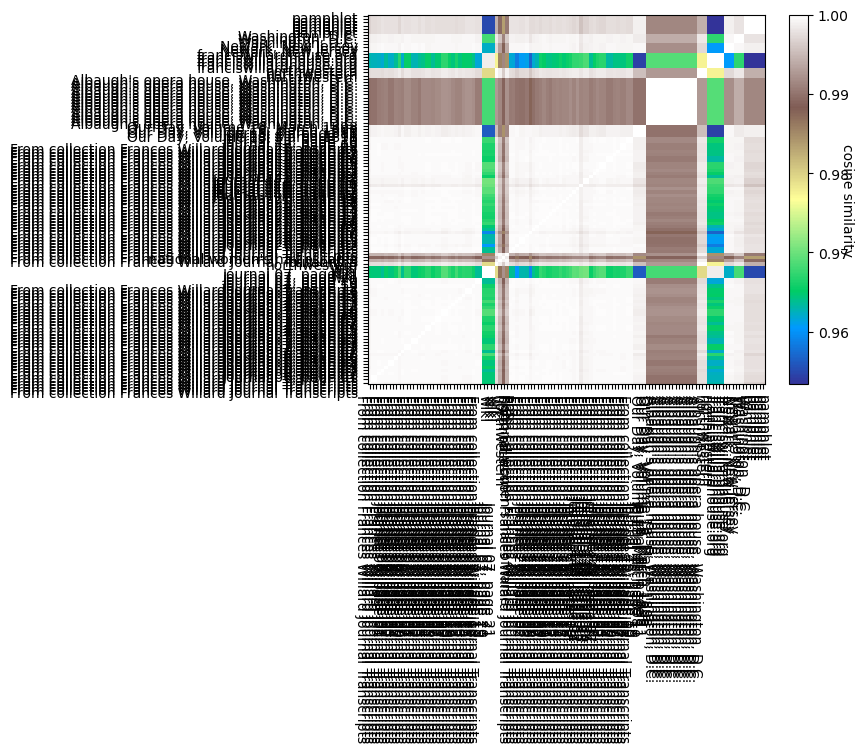

In [ ]:
# Heatmaps 2 - Docs
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [ ]:
# KEYWORDS
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

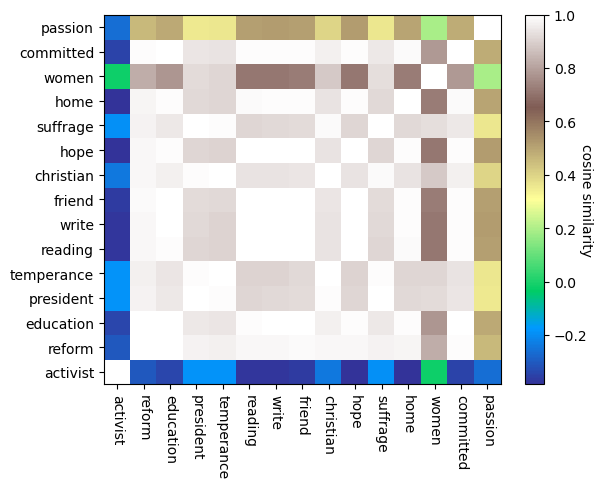

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [ ]:
# DOC - KEYWORDS
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

In [ ]:
fw_DF[:3]

,location,source,date,code,link,text_clean,text_clean2,tokenized_words,normalized_words,TaggedAbstracts
0,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,"February 1, 1859 My Room.",My Room,"[February, 1, 1859, My, Room]","[february, room]","([february, room], [Journal 06, page 01\nFrom ..."
1,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",process,NaN,I have been reading Todd's Student's Manual to...,I have been reading Todds Students Manual toda...,"[I, have, been, reading, Todd, 's, Student, 's...","[reading, todd, student, manual, today, ill, d...","([reading, todd, student, manual, today, ill, ..."
2,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,Henceforth I will not be without one.,Henceforth I will not be without one,"[Henceforth, I, will, not, be, without, one]",[henceforth],"([henceforth], [Journal 06, page 01\nFrom coll..."


# Comparing GPT 3.5, LLaMa2 (untuned), LLaMa2 (tuned on GPT 3.5) responses!

Clusters

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# gpt_results = pd.read_csv("/Users/ez/Desktop/text_memory_and_identity/fw_part_two/GPT Results - Sheet1_more0214.csv")
# gpt_results

,location,source,date,code,link,text_clean,text_clean2,kmeans_predictions
0,e5_improv_1,chatGPT,NaN,NaN,NaN,Frances Elizabeth Caroline Willard was a promi...,NaN,NaN
1,e5_improv_2,chatGPT,NaN,NaN,NaN,Frances Elizabeth Caroline Willard (September ...,NaN,NaN
2,e2_tune_1,chatGPT,NaN,NaN,NaN,Frances Willard was a prominent social reforme...,NaN,NaN
3,e2_tune_2,chatGPT,NaN,NaN,NaN,How would Frances Willard describe herself? [/...,NaN,NaN
4,e2_tune_3,chatGPT,NaN,NaN,NaN,Frances Willard would want to be remembered as...,NaN,NaN
5,gpt_context_1,NaN,NaN,NaN,NaN,Frances Willard was a prominent figure known f...,NaN,NaN
6,gpt_context_2,NaN,NaN,NaN,NaN,Frances Willard described her upbringing as be...,NaN,NaN
7,gpt_context_3,NaN,NaN,NaN,NaN,Frances Willard hoped to be remembered for her...,NaN,NaN
8,llama_untuned_1,NaN,NaN,NaN,NaN,"In my opinion, Frances Willard was a great lea...",NaN,NaN
9,llama_untuned_2,NaN,NaN,NaN,NaN,"Frances Willard was a women’s rights activist,...",NaN,NaN


In [ ]:
fw_DF = pd.concat([fw_DF, gpt_results], axis=0)

In [ ]:
import re 

# Clean text again
def clean_text(text):
    # Remove extra underscores and dashes
    cleaned_text = re.sub(r'[_-]+', ' ', text)

    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # Remove lines with dashes and underscores
    cleaned_text = re.sub(r'[-_]+', '', cleaned_text)

    # Remove dates like "May 26, 1859"
    cleaned_text = re.sub(r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}\b', '', cleaned_text)

    # Remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\'.-]', '', cleaned_text)

    # Remove punctuation
    cleaned_text = re.sub(r'[^\w\s]', "", cleaned_text)

    return cleaned_text

In [ ]:
# gpt_results['text_clean2'] = ""
# for index, row in gpt_results.iterrows():
#     cleaned = clean_text(row['text_clean'])
#     gpt_results.at[index, 'text_clean2'] = cleaned

In [ ]:
fw_DF['text_clean2'] = ""
for index, row in fw_DF.iterrows():
    cleaned = clean_text(row['text_clean'])
    fw_DF.at[index, 'text_clean2'] = cleaned

In [ ]:
# crtCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
crtCountVectorizer = CountVectorizer()

crtVects = crtCountVectorizer.fit_transform(gpt_results['text_clean'])

In [ ]:
# Perform TF-IDF
#initialize
crtTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(crtVects)
#train
crtTF = crtTFTransformer.transform(crtVects)
print(crtTF.shape)

(2944, 8880)


In [ ]:
# Print TF-IDF values
test = list(zip(crtCountVectorizer.vocabulary_.keys(), crtTF.data))
test.sort(key=lambda a: a[1], reverse = True)
test[:10] # Most salient ones

[('before', 1.0),
 ('first', 1.0),
 ('includes', 1.0),
 ('both', 1.0),
 ('public', 1.0),
 ('private', 1.0),
 ('father', 1.0),
 ('tender', 1.0),
 ('witty', 1.0),
 ('constructed', 1.0)]

In [ ]:
#initialize
crtTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
crtTFVects = crtTFVectorizer.fit_transform(fw_DF['text_clean'])

In [ ]:
try:
    print(crtTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(crtTFVectorizer.vocabulary_.keys())[:40]))

vector is missing
The available words are: ['february', '1859', 'room', 'reading', 'todd', 'student', 'today', 'ill', 'follow', 'note', 'book', 'day', '1st', 'make', 'breakfast', 'read', 'living', 'england', 'author', 'paper', 'sick', 'prime', 'war', 'pleasant', 'eyes', 'write', 'mother', 'mary', 'like', 'style', 'books', 'kind', 'die', 'dr', 'heard', 'don', 'think', 'mount', 'papers', 'course'] ...


In [ ]:
# Cluster with K-means: blindly trial and error with random n=cluster to start
from sklearn.cluster import KMeans

km3 = sklearn.cluster.KMeans(n_clusters= 4, init='k-means++')
km3.fit(crtTFVects)

KMeans(n_clusters=4)

In [ ]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(fw_DF['location'], km3.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(fw_DF['location'], km3.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(fw_DF['location'], km3.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(fw_DF['location'], km3.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'get_scorer_names', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_err

In [ ]:
fw_DF['kmeans_predictions'] = km3.labels_
fw_DF[:2]

,location,source,date,code,link,text_clean,text_clean2,tokenized_words,normalized_words,TaggedAbstracts,kmeans_predictions
0,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",NaN,NaN,"February 1, 1859 My Room.",Frances Elizabeth Caroline Willard was a promi...,"[February, 1, 1859, My, Room]","[february, room]","([february, room], [Journal 06, page 01\nFrom ...",0
1,evanston,"Journal 06, page 01\nFrom collection Frances W...","Feb 1st, 1859 - Feb 4th, 1859",process,NaN,I have been reading Todd's Student's Manual to...,Frances Elizabeth Caroline Willard was a pi...,"[I, have, been, reading, Todd, 's, Student, 's...","[reading, todd, student, manual, today, ill, d...","([reading, todd, student, manual, today, ill, ...",0


In [ ]:
# Distinguishing Features
numClusters = 4

terms = crtTFVectorizer.get_feature_names_out()
print("Top terms per cluster:")
order_centroids = km3.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 life
 day
 world
 man
 god
 think
 woman
 home
 like
 shall


Cluster 1:
 women
 willard
 wctu
 frances
 suffrage
 temperance
 woman
 president
 national
 work


Cluster 2:
 meeting
 1881
 ladies
 april
 march
 eve
 large
 day
 charleston
 atlanta


Cluster 3:
 time
 women
 life
 work
 years
 long
 age
 come
 way
 today




In [ ]:
# Visualize. Begin with reducing data dimension
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(crtTFVects.toarray())
crt_reduced_data = pca.transform(crtTFVects.toarray())

In [ ]:
fw_DF['location'].value_counts()

location
evanston                                                                   829
speech                                                                     678
wctu/later life                                                            512
travel                                                                     408
franciswillardhouse.org                                                    122
wiki                                                                       114
interview                                                                   97
eulogy                                                                      67
britannica                                                                  36
northwestern                                                                20
national women's hall of fame                                               20
https://www.aoc.gov/explore-capitol-campus/art/frances-e-willard-statue     15
pbs                                        

In [ ]:
# Color based on source
colordict = {
'evanston': 'thistle',
'speech': 'palegoldenrod',
'wctu/later life': 'mediumpurple',
'travel': 'plum',
'franciswillardhouse.org':'teal',
'wiki': 'royalblue',
'interview': 'lightseagreen',
'eulogy': 'darkkhaki',
'britannica': 'cornflowerblue',
'northwestern': 'lavender',
"national women's hall of fame": 'yellow',
'pbs': 'aquamarine',
'https://www.aoc.gov/explore-capitol-campus/art/frances-e-willard-statue': 'lightcyan',
# 'e5_improv_1': 'white',
# 'e5_improv_2': 'white',
'e5_improv_1': 'fuchsia',
'e5_improv_2': 'fuchsia',
'e2_tune_1': 'salmon',
'e2_tune_2': 'red',
'e2_tune_3': 'darkred',
# 'e2_tune_1': 'white',
# 'e2_tune_2': 'white',
# 'e2_tune_3': 'white',
'llama_untuned_1': 'orange',
'llama_untuned_2': 'darkorange',
'llama_untuned_3': 'orangered',
'gpt_context_1': 'hotpink',
'gpt_context_2': 'deeppink',
'gpt_context_3': 'mediumvioletred'
}
colors = [colordict[c] for c in fw_DF['location']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('evanston', 'thistle'), ('speech', 'palegoldenrod'), ('wctu/later life', 'mediumpurple'), ('travel', 'plum'), ('franciswillardhouse.org', 'teal'), ('wiki', 'royalblue'), ('interview', 'lightseagreen'), ('eulogy', 'darkkhaki'), ('britannica', 'cornflowerblue'), ('northwestern', 'lavender'), ("national women's hall of fame", 'yellow'), ('pbs', 'aquamarine'), ('https://www.aoc.gov/explore-capitol-campus/art/frances-e-willard-statue', 'lightcyan'), ('e5_improv_1', 'fuchsia'), ('e5_improv_2', 'fuchsia'), ('e2_tune_1', 'salmon'), ('e2_tune_2', 'red'), ('e2_tune_3', 'darkred'), ('llama_untuned_1', 'orange'), ('llama_untuned_2', 'darkorange'), ('llama_untuned_3', 'orangered'), ('gpt_context_1', 'hotpink'), ('gpt_context_2', 'deeppink'), ('gpt_context_3', 'mediumvioletred')])


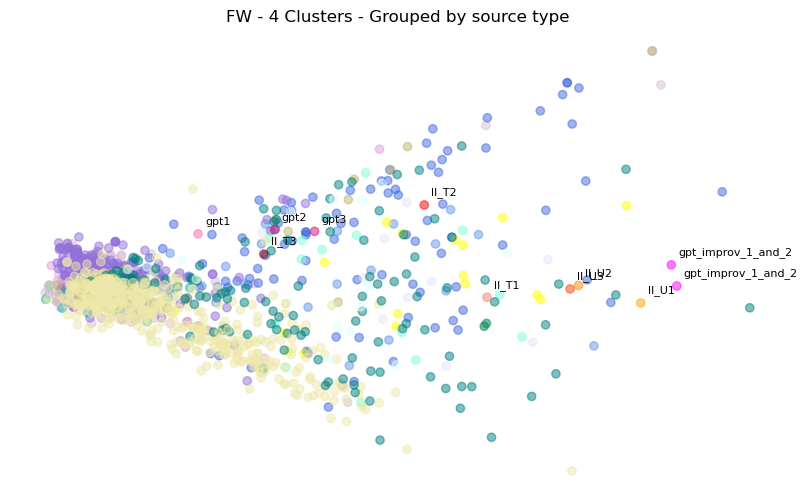

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(crt_reduced_data[:, 0], crt_reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)

# labels = ['llama_tune_1', 'llama_tune_2', 'llama_tune_3', 'llama_untuned_1', 
#           'llama_untuned_2', 'llama_untuned_3', 'gpt_context_1', 'gpt_context_2', 
#           'gpt_context_3']

labels = {'salmon': 'll_T1',
'red':'ll_T2',
'darkred':'ll_T3',
'orange': 'll_U1',
'darkorange': 'll_U2',
'orangered': 'll_U3',
'hotpink': 'gpt1',
'deeppink': 'gpt2',
'mediumvioletred': 'gpt3',
'fuchsia':'gpt_improv_1_and_2'
}

# Annotate points by specified colors
for i, color in enumerate(colors):
# for color in colors:
    if color in labels.keys():
        # ax.annotate(labels[color], (crt_reduced_data[i][0], crt_reduced_data[i][1]), textcoords="offset points", xytext=(5, 5), ha='left', va='bottom', fontsize=8, color='red')
        ax.annotate(labels[color], (crt_reduced_data[i][0], crt_reduced_data[i][1]), textcoords="offset points", xytext=(5, 5), ha='left', va='bottom', fontsize=8, color='black')

plt.xticks(())
plt.yticks(())
plt.title('FW - 4 Clusters - Grouped by source type')

plt.show()

This is pretty interesting. We can see that the untuned Llama2 responses performed just as bad as e5_improv 1 and 2, which are the results for Exercise 5 in which GPT tries to edit the wiki text according to new directions. 

We see that the tuned Llama2 responses (labelled ll_T1 to ll_T3, points are colored as a series of gradually darkening shades of red) move inwards, towards the journal writing styles and content (tan and purple). 

We can also see that the GPT responses are written differently than the Llama2 outputs, and they cluster together rather on the top left, close to the journal clusters. This makes sense as the GPT responses were produced after the LLM was provided text from FW's journals as training material. We can also note that the GPT responses do not match onto the purple or tan clusters. This may be due to fundamental differences in writing style (even differences such as writing in full sentences for an audience vs. fragmented sentences).

Using the same logic, perhaps the biggest difference between untuned Llama2/vanilla GPT and the tuned/trained versions is writing style. This is something I will have to take into more consideration in the future.